# Project Anc2Vec embeddings

## Install anc2vec package and other dependencies

In [1]:
!pip3 install -U pip > /dev/null
!pip3 install -U umap-learn > /dev/null
!pip3 install -U "anc2vec @ git+https://github.com/aedera/anc2vec.git" > /dev/null

  Running command git clone -q https://github.com/aedera/anc2vec.git /tmp/pip-install-jmgbbrgl/anc2vec_b2f3a667d96d4b798e0fb69e102e374a


## Load embeddings

This command loads 200-dimensional embeddings constructed using the obo file release 2020-10-06.

In [2]:
import anc2vec
import numpy as np

embeds = anc2vec.get_embeddings()
allembeds = np.asarray(list(embeds.values()))

## Make projections
Project the 200-dimensional embeddings onto a 2-dimensional space.

In [3]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
proj = reducer.fit_transform(allembeds)

## Visualize 2-D projections of embeddings

Visualize the projections of the embeddings as points where either the sub-ontologies or depths are color-encoded. 

These visualizations may slightly diverge from those presented in the manuscript as they were generated in different machines.

### Mapping sub-ontologies

In [4]:
# map sub-ontology (or namespace) to a color
name2color = {
    'biological_process': 'black',
    'cellular_component': 'tab:blue',
    'molecular_function': 'tab:red'
}

go = anc2vec.get_go() # the gene ontology
terms = list(embeds.keys()) # GO terms

# retrieve the sub-ontology of each term
namespaces = [go.ont[t]['namespace'] for t in terms]
# assign color to each retrieved sub-ontology
colors = [name2color[n] for n in namespaces]

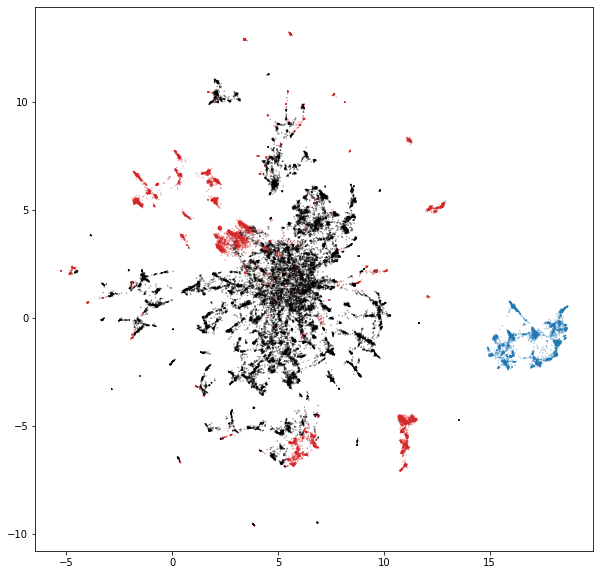

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(proj[:,0], proj[:,1], s=.05, c=colors)

### Mapping depths

In [6]:
depths = []
for t in terms:
  branches = go.get_ancestors(t)
  # depth = length of the longest path
  depth = max([len(b) for b in branches])
  depths.append(depth)

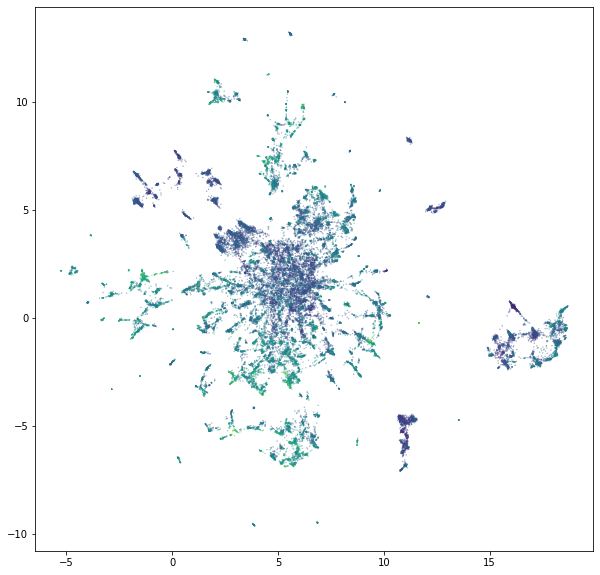

In [7]:
plt.scatter(proj[:,0], proj[:,1], s=.05, c=depths)